In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Size: 1545 x 2000


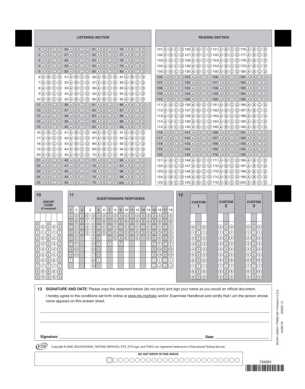

In [3]:
img_path = 'sample.png' 

img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
if img is None:
    print("Không load được ảnh! Kiểm tra tên file và đường dẫn.")
else:
    print(f"Size: {img.shape[1]} x {img.shape[0]}")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

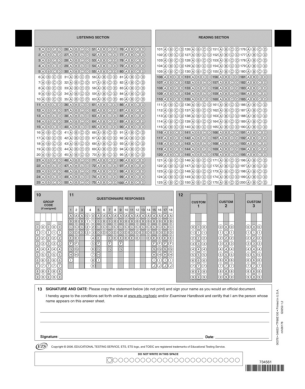

In [4]:
if img is None:
    print("Không load được ảnh!")
else:
    # Chuyển sang grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Hiển thị ảnh grayscale
    plt.imshow(img_gray, cmap='gray')
    plt.axis('off')
    plt.show()

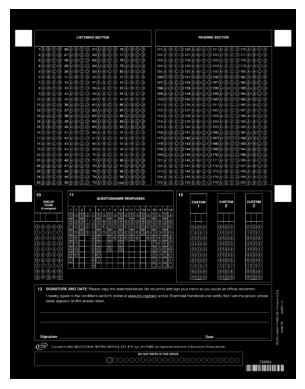

In [5]:
if img_gray is None:
    print("Chưa có ảnh grayscale! Chạy cell grayscale trước.")
else:
    # Thresholding: pixel > 127 → 255, <=127 → 0
    _, img_binary = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
    
    # Hiển thị ảnh binary
    plt.imshow(img_binary, cmap='gray')
    plt.axis('off')
    plt.show()


Cropped size: 1310 x 749 (WxH)


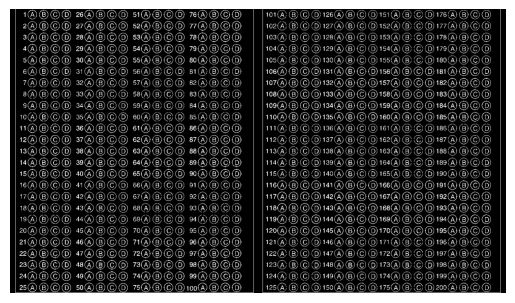

In [6]:
if img_binary is None:
    print("Chưa có ảnh binary!")
else:
    contours, _ = cv2.findContours(img_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    markers = []
    min_size = 18
    min_density = 0.7  # tối thiểu 70% pixel trắng trong bounding box
    
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if w < min_size or h < min_size:
            continue
        aspect_ratio = w / h
        if not (0.8 <= aspect_ratio <= 1.2):
            continue
        
        # Tính density (tỉ lệ pixel trắng)
        roi = img_binary[y:y+h, x:x+w]
        density = np.sum(roi==255) / (w*h)
        if density >= min_density:
            markers.append((x, y, w, h))
    
    centers = np.array([[x + w//2, y + h//2] for x, y, w, h in markers])
    s = centers.sum(axis=1)
    diff = np.diff(centers, axis=1)
    
    tl_idx = np.argmin(s)
    br_idx = np.argmax(s)
    tr_idx = np.argmin(diff)
    bl_idx = np.argmax(diff)
    
    # Lấy các điểm pixel theo yêu cầu
    tl_rect = markers[tl_idx]
    tr_rect = markers[tr_idx]
    br_rect = markers[br_idx]
    bl_rect = markers[bl_idx]

    # Crop bằng slicing numpy
    x_min = tl_rect[0] + tl_rect[2]      # bottom-right x của top-left marker +1
    y_min = tl_rect[1] + tl_rect[3]       # bottom-right y của top-left marker +1

    x_max = tr_rect[0]            # top-left x của top-right marker -1
    y_max = bl_rect[1]                    # top-left y của bottom-left marker -1

    img_crop = img_binary[y_min:y_max, x_min:x_max]

    print(f"Cropped size: {img_crop.shape[1]} x {img_crop.shape[0]} (WxH)")

    # Hiển thị crop
    plt.imshow(cv2.cvtColor(img_crop, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

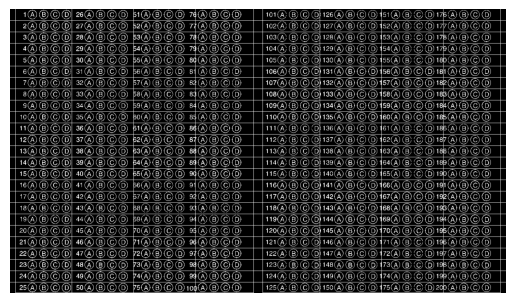

In [8]:
if img_crop is None:
    print("Chưa có ảnh crop! Chạy cell crop trước.")
else:
    img_grid = img_crop.copy()
    h, w = img_crop.shape[:2]
    mid_x = w // 2
    left_bbox = (0, 0, mid_x, h)
    right_bbox = (mid_x, 0, w - mid_x, h)

    n_rows = 25
    n_cols = 4

     # Hàm vẽ lưới trong bbox
    def draw_grid(bbox, color=(255,0,0)):
        x0, y0, bw, bh = bbox
        step_y = bh // n_rows+1
        step_x = bw // n_cols
        # Đường ngang
        for i in range(1, n_rows):
            y = y0 + i * step_y
            cv2.line(img_grid, (x0, y), (x0+bw, y), color, 1)
        # Đường dọc
        for j in range(1, n_cols):
            x = x0 + j * step_x
            cv2.line(img_grid, (x, y0), (x, y0+bh), color, 1)

    # Vẽ cho cả 2 nửa
    draw_grid(left_bbox)
    draw_grid(right_bbox)

    # Hiển thị
    plt.imshow(cv2.cvtColor(img_grid, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
